# Сокращение размерности

В каждом из заданий:
* Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков
* Попребирайте различное количество итоговых размерностей и постройте графики качества от количества размерностей. Выведите обе модели на одном графике в каждой заадче

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from IPython.display import clear_output, display
from sklearn.model_selection import train_test_split

np.random.seed(5)
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

# Forward selection (2pts)

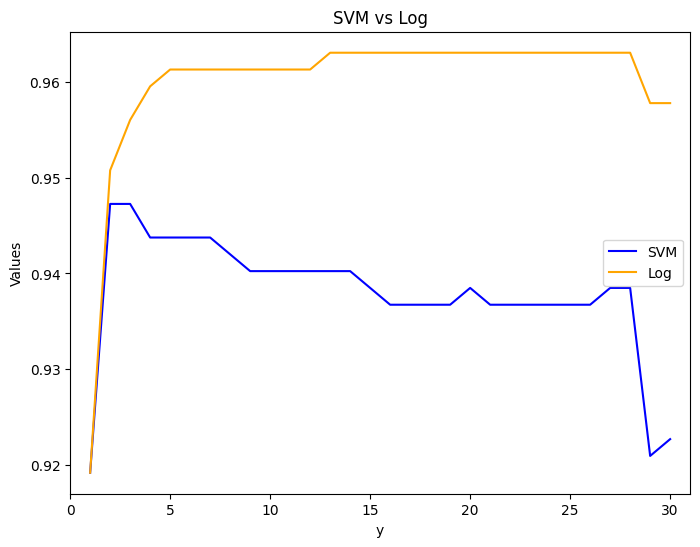

In [50]:
def add_best_id(model, used):
    best_id = -1
    best_res = -1
    for i in range(30):
        if used[i]:
            continue
        used[i] = True
        inp_data = X[:,np.where(used)][:,0]
        used[i] = False
        model.fit(inp_data, y)
        cur_y = model.predict(inp_data)
        accuracy = accuracy_score(y, cur_y)
        if accuracy > best_res:
            best_id = i
            best_res = accuracy
    used[best_id] = True
    inp_data = X[:,np.where(used)][:,0]
    model.fit(inp_data, y)
    cur_y = model.predict(inp_data)
    return accuracy_score(y, cur_y)


logistic_model = LogisticRegression(max_iter=10000)
svm_model = svm.SVC(max_iter=10000)
used_log_prs, used_svm_prs = np.array([False] * 30), np.array([False] * 30)
log_res, svm_res, ids = [], [], []

fig, ax = plt.subplots(figsize=(8, 6))

for res_cnt in range(1, 31):
    log_acc = add_best_id(logistic_model, used_log_prs)
    svm_acc = add_best_id(svm_model, used_svm_prs)
    log_res.append(log_acc)
    svm_res.append(svm_acc)
    ids.append(res_cnt)
    ax.cla()
    ax.plot(ids, svm_res, label='SVM', color='blue')
    ax.plot(ids, log_res, label='Log', color='orange')
    ax.set_xlim(0, 31)
    # ax.set_ylim(0, 1)
    ax.set_title("SVM vs Log")
    ax.set_xlabel("y")
    ax.set_ylabel("Values")
    ax.legend()
    display(fig)
    plt.pause(0.1)
    clear_output(wait=True)


# Backward elimination (2pts)

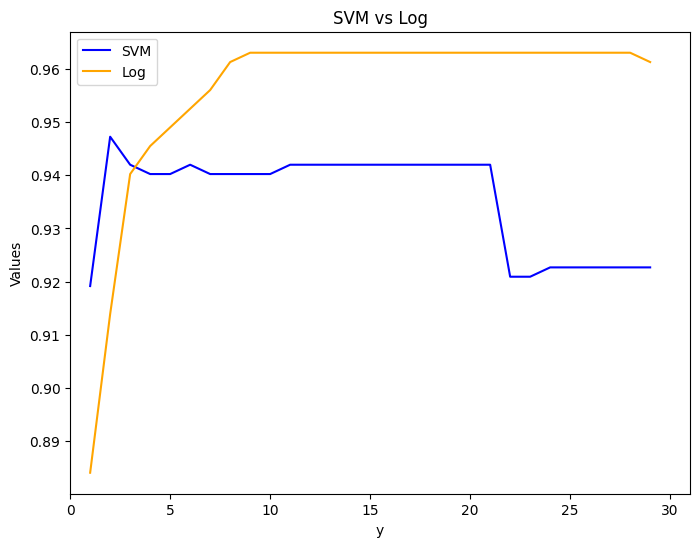

In [52]:
def del_baddest_id(model, used):
    best_id = -1
    best_res = -1
    for i in range(30):
        if not used[i]:
            continue
        used[i] = False
        inp_data = X[:,np.where(used)][:,0]
        used[i] = True
        model.fit(inp_data, y)
        cur_y = model.predict(inp_data)
        accuracy = accuracy_score(y, cur_y)
        if accuracy > best_res:
            best_id = i
            best_res = accuracy
    used[best_id] = False
    inp_data = X[:,np.where(used)][:,0]
    model.fit(inp_data, y)
    cur_y = model.predict(inp_data)
    return accuracy_score(y, cur_y)


logistic_model = LogisticRegression(max_iter=10000)
svm_model = svm.SVC(max_iter=10000)
used_log_prs, used_svm_prs = np.array([True] * 30), np.array([True] * 30)
log_res, svm_res, ids = [], [], []

fig, ax = plt.subplots(figsize=(8, 6))

for res_cnt in range(30, 0, -1):
    if res_cnt!=30:
        log_acc = del_baddest_id(logistic_model, used_log_prs)
        svm_acc = del_baddest_id(svm_model, used_svm_prs)
        log_res.append(log_acc)
        svm_res.append(svm_acc)
        ids.append(res_cnt)
    ax.cla()
    ax.plot(ids, svm_res, label='SVM', color='blue')
    ax.plot(ids, log_res, label='Log', color='orange')
    ax.set_xlim(0, 31)
    ax.set_title("SVM vs Log")
    ax.set_xlabel("y")
    ax.set_ylabel("Values")
    ax.legend()
    display(fig)
    plt.pause(0.1)
    clear_output(wait=True)


# PCA (2 pts)


### EM алгоритм

Оставлю это тут просто чтобы пугать людей


$$
\log p(x|\theta) = \int q(z)\log p(x|\theta)dz = \int q(z)\log\dfrac{p(x,z|\theta)}{p(z|x,\theta)}dz = \int q(z)\log\dfrac{p(x,z|\theta)}{q(z)}dz+\int q(z)\log\dfrac{q(z)}{p(z|x,\theta)}dz = \mathcal{L}(q,\theta)+KL(q(z)|p(z|x,\theta))
$$

** E-step **
$$ q(z)^{(n+1)} = p(z|x,\theta^{(n)}) $$
** M-step **
$$ \theta^{(n+1)} = \max\limits_{\theta} \mathcal{L}(q^{(n+1)},\theta) $$

Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков. Попребирайте различное количество итоговых размерностей (до которых будет сокращать PCA) и постройте графики для обоих классификаторов. Сделайте выводы.





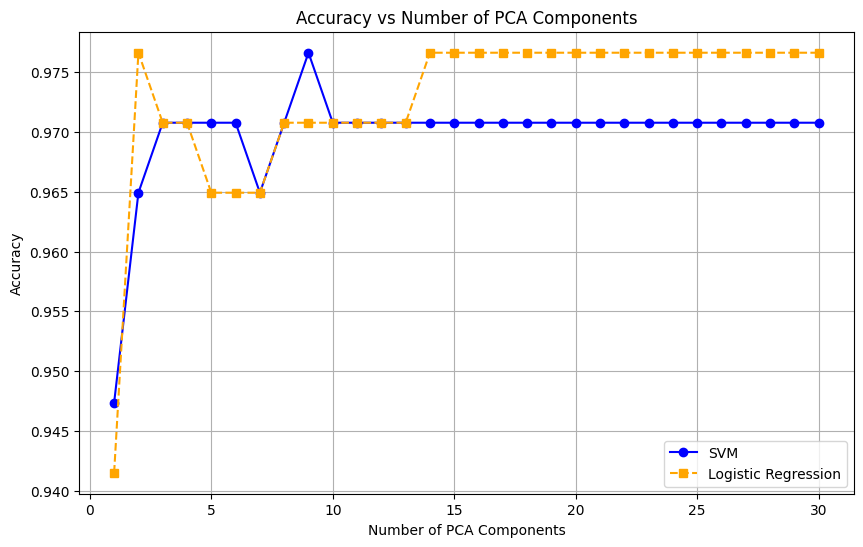

Максимальная точность SVM: 0.9766081871345029
Максимальная точность логистической регрессии: 0.9766081871345029


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
n_components_range = range(1, X.shape[1] + 1)
svm_accuracies = []
logreg_accuracies = []
for n_components in n_components_range:
    pca = decomposition.PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    svm_model = svm.SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train_pca, y_train)
    y_pred_svm = svm_model.predict(X_test_pca)
    svm_accuracies.append(accuracy_score(y_test, y_pred_svm))
    logreg = LogisticRegression(random_state=42, max_iter=1000)
    logreg.fit(X_train_pca, y_train)
    y_pred_logreg = logreg.predict(X_test_pca)
    logreg_accuracies.append(accuracy_score(y_test, y_pred_logreg))

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, svm_accuracies, label='SVM', marker='o', linestyle='-', color='blue')
plt.plot(n_components_range, logreg_accuracies, label='Logistic Regression', marker='s', linestyle='--', color='orange')
plt.title("Accuracy vs Number of PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

print("Максимальная точность SVM:", max(svm_accuracies))
print("Максимальная точность логистической регрессии:", max(logreg_accuracies))



# plt.cla()
# pca = decomposition.PCA(n_components=#check different number of reduced components
# pca.fit(X)
# X = pca.transform(X)



#  Выводы (1pts)

Мало признаков - плохо, много признаков - плохо.

Что Forward, что backward, что PCA дают примерно одинаковый результат.